<a href="https://colab.research.google.com/github/mbrckalo997/pppo-segmentacija/blob/main/it54_2018_br%C4%8Dkalo_milan_segmentacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Univerzitet u Novom Sadu**

**Fakultet tehničkih nauka**

**Departman za industrijsko inženjerstvo i menadžment**

**Inženjerstvo informacionih sistema**

**Predmet:** *Principi prezentacije i prepoznavanja oblika*

**Tema:** *Segmentacija*

**Student:** *Milan Brčkalo IT54/2018*

**Datum:** *Jun 2022*

# **Uvod**

U projektu koji je izrađen u okviru predmeta *Principi prezentacije i prepoznavanja oblika* bilo je neophodno obraditi temu segmentacije. Segmentacija predstavlja jednu od tehnika digitalne obrade slike. Da bi se navedena tehnika predstavila na pogodan način, plan izrade projekta je sastavljen iz dva dijela - teoretskog i praktičnog.

U teoretskom dijelu projekta je obrađen koncept segmentacije kao i metode, algoritmi i tehnike koje se mogu pojaviti u izradi modela.

Nakon teoretske obrade segmentacije predstavljen je skup podataka (engl. *dataset*) odnosno skup slika i maski koje su nastale pri seizmičkim istraživanjima. U datom skupu podataka problem koji će se rješavati jeste identifikacija na nivou svakog piksela da li je na njemu prikazana so ispod površine ili ne.

Na kraju će biti predstavljen U-Net, konvolucijska neuronska mreža koja obezbjeđuje brzu i preciznu semantičku segmentaciju slika.

U praktičnom dijelu će biti predstavljena realizacija projekta upotrebom PyTorch, radnog okruženja (engl. *framework*) otvorenog koda zasnovanog na biblioteci Torch, koji se koristi za računarsku viziju (engl. *computer vision*) i obradu prirodnog jezika (engl. *natural language processing* ili *NLP*). Razvijen je od strane Meta AI. 

Izrada projekta se sastoji od učitavanja podataka, vizuelizacije, izrade modela, treniranja, evaluacije i testiranja.

# **Segmentacija**

### **Opis**

U digitalnoj obradi slike, segmentacija predstavlja proces podjele slike na više segmenata tj. različitih regiona ili kategorija. Kako segment predstavlja skup piksela, svaka regija sadrži piksele sa sličnim atributima, a svaki piksel na slici se dodjeljuje jednoj kategoriji. Stoga, segmentacija slike predstavlja postupak dodjeljivanja oznake svakom pikselu na slici tako da pikseli sa istom oznakom dijele određene karakteristike. \[1\]

Cilj segmentacije jeste da se pojednostavi i/ili promjeni prikaz slike u nešto što je smislenije i lakše za analiziranje. Ona se obično koristi za lociranje objekata i granica na slikama.

Podjela slike na ispravne segmente je često vrlo izazovan problem i jako je važno da ona bude dobro odrađena jer kvalitet i pouzdanost segmentacije diktiraju da li će analiza slike biti uspješna, pa će tako i sve druge faze u analizi slike biti pojednostavljene.

### **Metode segmentacije**

U literaturi se mogu pronaći različite podjele kada su u pitanju tehnike koje se primjenjuju pri segmentaciji slika. Međutim, kada se govori o osnovnoj podjeli, izdvajaju se dvije najčešće korišćene tehnike:

* **semantička segmentacija** ili *tehnika izdvajanja regiona* koja je zasnovana na izdvajanju cijelog objekta od pozadine pridružujući piksele čija je svjetlost ispod nekog praga pozadini, a ostale objektu i obrnuto \[2\]
* **segmentacija instance** ili *tehnika pronalaženja ivica* koja je zasnovana na izdvajanju samo onih piksela koji pripadaju ivicama objekata \[3\]

Primjeri kako izgledaju semantička i segmentacija instance je prikazano sljedećoj slici:

![Slika 1](https://drive.google.com/uc?id=16mt5sNQMV_AjdlZvCr-rjck6vkJqkWJK)

### **Algoritmi i tehnike za segmentaciju**

Kao i sa metodama, postoje različite podjele algoritama i tehnika za segmentaciju ali četiri tehnike koje se najčešće koriste su:

* **segmentacija pragom (engl. *Thresholding*)** 
* **segmentacija klasterizacijom (engl. *Clustering*)**
* **segmentacija regionom (engl. *Region*)**
* **segmentacija granicom regiona (engl. *Edge*)**

Segmentacija pragom predstavlja grupu metoda zasnovanih na poređenju osvjetljenosti piksela sa jednim ili više pragova, pa tako imamo segmentaciju sa jednim i segmentaciju sa više pragova. Segmentacija sa jednim pragom predstavlja najjednostavniji vid segmentacije i njegova osnovna primjena je za odvajanje objekta od pozadine, ukoliko pozadina ima uniformnu osvjetljenost (boju) koja se razlikuje od objekta. Ovakav način segmentacije se može primjeniti npr. kod izdvajanja pisanog ili štampanog teksta ili analize biomedicinskih slika. Segmentacija sa više pragova je metoda koju je pogodno koristiti u slučaju kada imamo scene sa više različitih objekata. \[1\]

Segmentacija klasterizacijom je jedna od najstarijih tehnika segmentacije, s obzirom da se može koristiti za segmentaciju sivih i slika u boji. Za vektor x = \[x1, x2, … , xN\] koji predstavlja mjerenja karakteristika jednog piksela slike, mjerene veličine mogu biti tri komponente boje piksela ili neka druga obilježja izračunata u malom prozoru oko posmatranog piksela. Postupak segmentacije se u tom slučaju sastoji od podjele N–dimenzionalnog prostora u uzajamno isključive oblasti, pri čemu svaka ta oblast obuhvata grupu podataka koja se odnosi na jedan region slike. Takav proces podjele prema sličnosti vektora podataka se naziva klasterizacija. U prvoj fazi segmentacije vrši se izračunavanje i izdvajanje nekih obilježja slike. Sljedeća faza podrazumijeva određivanje optimalnog broja regiona (klastera), kao i određivanje skupa vektora koji predstavljaju centre svakog klastera. Nakon toga se vrši pridruživanje svakog piksela jednom od klastera. Pridruživanje se vrši na osnovu sličnosti vektora koji opisuje piksel i vektora koji opisuje centar klastera. Ova metoda je sa dosta uspjeha primjenjivana u segmentaciji multispektralnih satelitskih ili avionskih snimaka, gdje je osnovni cilj bio izdvajanje regiona na površini zemlje koji imaju iste karakteristike, kao što su npr. isti tip poljoprivrednih kultura. Nedostatak ove metode je što ima veliku računsku složenost. \[4\]

Segmentacija regionom predstavlja skup metoda koje pokušavaju da izdvoje područja slike koja su homogena sa gledišta određenih karakteristika. U ovu grupu spadaju:

* segmentacija pomoću rasta regiona
* segmentacija pomoću razdvajanja i spajanja regiona

U procesu segmentacije koji koristi ivice (granice regiona) mora se primjeniti i neki postupak za spajanje ivica, kako bi se formirale neprekidne granice regiona iz razloga što metode koje vrše izdvajanje ivica generišu isprekidane granice objekata a ne zatvorene krive. U tu svrhu se mogu koristiti metoda spajanja ivica fitovanjem krive, spajanje ivica heurističkim metodama i spajanje ivica Hafovom transformacijom. Metodom fitovanja krivih se mogu rekonstruisati nedostajući segmenti ukoliko mapa ivica sadrži prekinute ivice. Fitovanje krivih je najjednostavnije kada nam je poznat oblik krive, pa se nedostajući segment dobija fitovanjem npr. pravih ili kružnih oblika. Kada su granice regiona složenije, vrši se razlaganje granice na jednostavnije dijelove. Glavna prednost ovog metoda je njena izuzetna jednostavnost i ona daje dobre rezultate u slučaju segmentacije jednostavnih scena. Međutim, kada su slike na kojima postoji veći broj objekata koji se preklapaju, mapa ivica sadrži tačke grananja, pa u tom slučaju ova metoda ne daje dobre rezultate. Kod heurističkih metoda za spajanje ivica se prvo formira gradijentna slika primjenom odgovarajućih maski. \[5\]


# **Skup podataka**

U okviru projekta potrebno je izgraditi model koji bi prihvatao ulazne slike koje predstavljaju satelitske snimke Zemlje i zatim predviđao na nivou svakog piksela da li je na njemu prikazana so ispod površine Zemlje. Tačnije, model bi izvršio segmentaciju slike na dio koji predstavlja so i dio koji predstavlja površinu Zemlje na kojoj se ne nalazi so.

Skup podataka koji je korišćen za izradu ovog projekta se može pronaći [ovdje](https://drive.google.com/file/d/1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF/view?usp=sharing).

Ključna struktura skupa podataka je sastavljena od:

* **train** foldera koji sadrži slike (koje se koriste za treniranje modela) i maske (koje prikazuju segmentaciju odnosno svaka slika ima odgovarajuću masku koja (ne) sadrži identifikovane lokacije soli)
* **test** foldera koji sadrži slike (bez maski) koje će biti korištene u fazi testiranja odnosno potrebno je da model sam odredi segmente gdje se (ne) nalazi so

Način kako je egzistirao skup podataka u fazi treniranja i testiranja jeste da su trening slike upotrebljene za obučavanje modela kako bi se lakše prikazala razlika između stvarne i predviđene maske. Nakon toga, nad modelom su upotrebljene test slike i rezultat predikcije je sačuvan u poseban CSV fajl koji sadrži piksele slike gdje je predviđeno prisustvo soli.

# **Model**

U okviru projekta korišćena je U-Net konvolucijska neuronska mreža koja obezbjeđuje brzu i preciznu semantičku segmentaciju slika. Njena arhitektura može se posmatrati kao mreža enkodera koju prati mreža dekodera. Za razliku od klasifikacije gdje je krajnji rezultat mreže jedina važna stvar, semantička segmentacija ne zahtjeva samo diskriminaciju na nivou piksela već i mehanizam za projektovanje diskriminativnih karakteristika naučenih u različitim fazama enkodera na prostor piksela.

Mreža se sastoji od ugovarajuće (engl. *contracting*) i ekspanzivne (engl. *expansive*) putanje što joj daje arhitekturu u obliku slova U. Ugovarajući put je tipična konvolucijska neuronska mreža koja se sastoji od ponovljene primjene konvolucija, nakon čega slijedi ispravljena linearna jedinica (engl. *Rectified Linear Unit* ili *ReLU*) i maksimalna operacija udruživanja (engl. *max pooling*). \[6\]

Tokom kontrakcije, prostorne informacije se smanjuju dok se informacije o karakteristikama povećavaju. Ekspanzivni put kombinuje karakteristike i prostorne informacije kroz niz konvolucija naviše i konkatanira sa karakteristikama sa putanje ugovaranja.

Vizuelni prikaz opisanog modela se može pogledati na sljedećoj slici:

![Slika 2](https://drive.google.com/uc?id=1t7KPd9DgeLiDvjXV9GvJWeXboND3tJpU)

# **Zaključak**

Projekat je zamišljen da se što bliže približi koncept segmentacije kao jedna od tehnika koje se pojavljuju u svijetu dubokog učenja.

Prvo teoretski, a zatim i praktično se obrađuje segmentacija i tema. Tema je ispraćena kroz skup podataka u vidu slika i maski seizmičkih istraživanja. Cilj je bio odrediti segmente prisustva soli.

Iskustvo tokom rada na projektu donijelo je još lakše razumijevanje kako konvolucijske neuronske mreže funkcionišu tako i šire shvatanje zadatog skupa podataka kako se može upotrijebiti u budućnosti za neko novo istraživanje ili izradu drugačije neuronske mreže.

# **Reference**

\[1\] Linda G. Shapiro, George C. Stockman. *Computer Vision*. New Jersey. Prentice-Hall (2001)

\[2\] Guo Dazhou, Pei Yanting, Zheng Kang, Yu Hongkai, Lu Yuhang, Wang Song. *Degraded Image Semantic Segmentation With Dense-Gram Networks*. IEEE Transactions on Image Processing (2020)

\[3\] Yi Jingru, Wu Pengxiang, Jiang Menglin, Huang Qiaoying, Hoeppner J. Daniel, Metaxas N. Dimitris. *Attentive neural cell instance segmentation*. Medical Image Analysis (2019)

\[4\] Barghout Lauren, Sheynin Jacob. *Real-world scene perception and perceptual organization: Lessons from Computer Vision*. Journal of Vision (2013)

\[5\] Umbaugh E. Scott. *Digital image processing and analysis: Human and computer vision Applications with CVIPtools (2nd)*. Boca Raton, FL. CRC Press (2010)

\[6\] Olaf Ronneberger, Philipp Fischer, Thomas Brox. *U-Net: Convolutional Networks for Biomedical Image Segmentation*. Springer (2015)

\[7\] https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection

Prije početka pokretanja svake od ćelija (koja sadrži kod) neophodno je promijeniti tip izvršavanja odnosno podesiti da se projekat izvršava isključivo na grafičkom procesu (engl. *graphics processing unit* ili *GPU*). Ovo se podešava tako što se prati *Runtime > Change runtime type* i u padajućem meniju pod *Hardware accelerator* izabere GPU.

Kada je sve podešeno, potrebno je preuzeti skup podataka i raspakovati na lokaciji koja je dodjeljena projektu.

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF" -O dataset.zip && rm -rf /tmp/cookies.txt

--2022-06-26 19:19:02--  https://docs.google.com/uc?export=download&confirm=t&id=1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF
Resolving docs.google.com (docs.google.com)... 173.194.194.102, 173.194.194.101, 173.194.194.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.194.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ldtdaoivldt364k29i9gaaqhbp92d2kg/1656271125000/06049624160957438625/*/1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF?e=download [following]
--2022-06-26 19:19:02--  https://doc-0s-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ldtdaoivldt364k29i9gaaqhbp92d2kg/1656271125000/06049624160957438625/*/1y3S7yfpdrR_MutnotPAR8OnNqRX3POVF?e=download
Resolving doc-0s-64-docs.googleusercontent.com (doc-0s-64-docs.googleusercontent.com)... 142.250.148.132, 2607:f8b0:4001:c54::84
Connecting to doc-0s-64-docs.googleusercontent.com (doc-

In [2]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: competition_data.zip    
  inflating: depths.csv              
  inflating: flamingo.zip            
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.csv               
  inflating: train.zip               


In [3]:
!mkdir -p /content/dataset/train
!unzip train.zip -d /content/dataset/train

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/images/d80ead8703.png  
  inflating: /content/dataset/train/images/b012e9ebb0.png  
  inflating: /content/dataset/train/images/d3034e7a60.png  
  inflating: /content/dataset/train/images/ae2ef70d51.png  
  inflating: /content/dataset/train/images/1af44a9db0.png  
  inflating: /content/dataset/train/images/41cfd4b320.png  
  inflating: /content/dataset/train/images/853e89d0d3.png  
  inflating: /content/dataset/train/images/2a484baa26.png  
  inflating: /content/dataset/train/images/92e617896e.png  
  inflating: /content/dataset/train/images/b70f0ab0c2.png  
  inflating: /content/dataset/train/images/e8757626a1.png  
  inflating: /content/dataset/train/images/6a3d92ce59.png  
  inflating: /content/dataset/train/images/127ef4105f.png  
  inflating: /content/dataset/train/images/d21012f5c1.png  
  inflating: /content/dataset/train/images/1cb9549d2c.png  
  inflating: /content/dataset/train/images/e030bd

In [4]:
!mkdir -p /content/dataset/test
!unzip test.zip -d /content/dataset/test

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/test/images/a3df74dd31.png  
  inflating: /content/dataset/test/images/187ecc32d5.png  
  inflating: /content/dataset/test/images/54538419f5.png  
  inflating: /content/dataset/test/images/93614d4b95.png  
  inflating: /content/dataset/test/images/50a91adce8.png  
  inflating: /content/dataset/test/images/97d23cea10.png  
  inflating: /content/dataset/test/images/ca04c19c0b.png  
  inflating: /content/dataset/test/images/d168218bac.png  
  inflating: /content/dataset/test/images/a670e833a4.png  
  inflating: /content/dataset/test/images/a964a0f499.png  
  inflating: /content/dataset/test/images/371bf59030.png  
  inflating: /content/dataset/test/images/fc74f77bae.png  
  inflating: /content/dataset/test/images/f63dc1e3be.png  
  inflating: /content/dataset/test/images/b807539a5f.png  
  inflating: /content/dataset/test/images/1dfcbf4bca.png  
  inflating: /content/dataset/test/images/a971d2ae53.png  
  inf

Nakon učitavanja skupa podataka neophodno je uvesti i biblioteke uz kojih će se lakše i efikasnije uraditi model koji je opisan. Kao što je navedeno u uvodu, za potrebe ovog projekta koristi se PyTorch, radni okvir otvorenog koda razvijen od strane Meta AI, odnosno torchvision biblioteka koja je namjenjena za računarsku viziju. 

Pored toga biće potrebne biblioteke za rad sa slikama, listama i grafičkim prikazima.

In [5]:
import os
import random
import time
import math
import glob

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import torch

import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as T

from torch.utils.data import Dataset, DataLoader

from PIL import Image

Ukoliko je dostupna CUDA, platforma za paralelnu obradu, onda će se model pokretati na njoj jer je to od velikog značaja (ušteda vremena).

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Radi lakšeg snalaženja kreiraju se konstante koje predstavljaju putanje prema odgovarajućim folderima i fajlovima.

In [7]:
DATASET_PATH = '/content/dataset/'

IMAGE_DATASET_TRAIN_PATH = os.path.join(DATASET_PATH, 'train/images')
MASK_DATASET_TRAIN_PATH = os.path.join(DATASET_PATH, 'train/masks')
IMAGE_DATASET_TEST_PATH = os.path.join(DATASET_PATH, 'test/images')

SAMPLE_SUBMISSION_PATH = 'sample_submission.csv'

MODEL_OUTPUT_PATH = 'unet_model.pth'

Uključivanje svih trening slika i maski u projekat.

In [8]:
image_train_d = os.listdir(IMAGE_DATASET_TRAIN_PATH)
mask_train_d = os.listdir(MASK_DATASET_TRAIN_PATH)

Prikaz tri nasumično izabrana uzorka (prikaz slike, maske i slike sa maskom). Maska na slici je označena zelenom bojom.

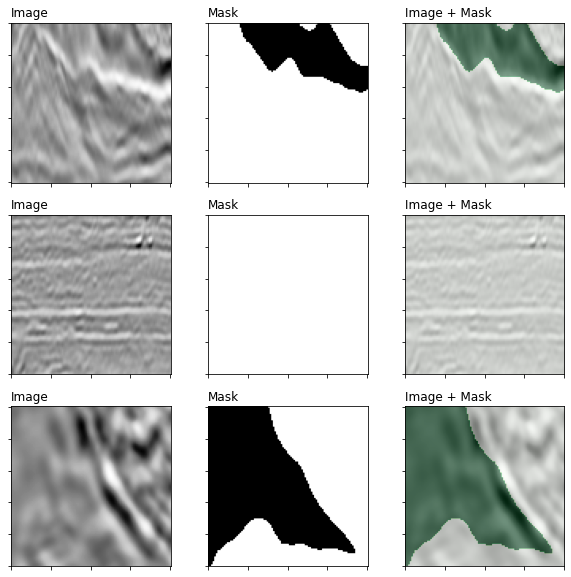

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for i in range(3):
    r = random.randint(0, len(image_train_d) - 1)

    image = Image.open(os.path.join(IMAGE_DATASET_TRAIN_PATH + '/{}'.format(image_train_d[r])))
    mask = Image.open(os.path.join(MASK_DATASET_TRAIN_PATH + '/{}'.format(mask_train_d[r])))

    transforms = T.Compose([T.Grayscale(), T.ToTensor()])

    image = torch.stack([transforms(image)])
    mask = torch.stack([transforms(mask)])

    ax[i,0].imshow(image.squeeze(), cmap='Greys')
    ax[i,1].imshow(mask.squeeze(), cmap='Greys')
    ax[i,2].imshow(image.squeeze(), cmap='Greys')
    ax[i,2].imshow(mask.squeeze(), cmap='Greens', alpha=0.5)

    ax[i,0].set_yticklabels([])
    ax[i,0].set_xticklabels([])
    ax[i,1].set_yticklabels([])
    ax[i,1].set_xticklabels([])
    ax[i,2].set_yticklabels([])
    ax[i,2].set_xticklabels([])

    ax[i,0].set_title('Image', loc='left')
    ax[i,1].set_title('Mask', loc='left')
    ax[i,2].set_title('Image + Mask', loc='left')

plt.show()

Kreiranje segmentacionog skupa podataka koji će biti korišćen u nastavku realizacije projekta.

In [10]:
class SegmentationDataset(Dataset):
    def __init__(self, image_path, mask_path):
        self.image_path = image_path
        self.mask_path = mask_path
        
        images = glob.glob(image_path + '/*.png')

        samples = []

        for image in images:
            samples.append(image.split('/')[-1].split('.')[0])
            
        self.samples = samples
        
        self.transforms = T.Compose([T.Grayscale(), T.ToTensor()])
            
    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.image_path, self.samples[idx] + '.png'))
        mask = Image.open(os.path.join(self.mask_path, self.samples[idx] + '.png'))

        return self.transforms(image), self.transforms(mask)

    def __len__(self):
        return len(self.samples)

In [11]:
train_dataset = SegmentationDataset(IMAGE_DATASET_TRAIN_PATH, MASK_DATASET_TRAIN_PATH)

Definisanje konvolucijskog bloka.

In [12]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, activation=True):
        super(ConvBlock, self).__init__()

        self.activation = activation

        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=kernel_size // 2)

        self.norm = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        x = self.conv(x)
        x = self.norm(x)

        if self.activation:
            return F.relu(x)
        else:
            return x

Definisanje rezidualnog bloka.

In [13]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3):
        super(ResidualBlock, self).__init__()

        self.norm = nn.BatchNorm2d(in_channels)

        self.conv1 = ConvBlock(in_channels, out_channels, kernel_size)
        self.conv2 = ConvBlock(out_channels, out_channels, kernel_size, activation=False)

    def forward(self, x):
        residual = x

        x = F.relu(x)

        x = self.norm(x)
        x = self.conv1(x)
        x = self.conv2(x)

        return x

In [14]:
class DeconvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=2, stride=2):
        super(DeconvBlock, self).__init__()
        
        self.deconv = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride)

    def forward(self, x1, x2):
        xd = self.deconv(x1)

        x = torch.cat([xd,x2], dim=1)

        return x

Konačno, definisanje U-Net konvolucijske neuronske mreže koja će biti model i nad kojom će se vršiti treniranje. Prilikom definisanja modela kombinuju se konvolucijski i rezidualni blokovi kako bi se izgradila ResNet mreža.

In [15]:
class UNet(nn.Module):
    def __init__(self, filters=16, dropout=0.5):
        super(UNet, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, filters, 3, padding=1),
            ResidualBlock(filters, filters),
            ResidualBlock(filters, filters),
            nn.ReLU()
        )
        
        self.conv2 = nn.Sequential(
            nn.MaxPool2d(2, 2),
            nn.Dropout(dropout / 2),
            nn.Conv2d(filters, filters * 2, 3, padding=1),
            ResidualBlock(filters * 2, filters * 2),
            ResidualBlock(filters * 2, filters * 2),
            nn.ReLU()
        )
        
        self.conv3 = nn.Sequential(
            nn.MaxPool2d(2, 2),
            nn.Dropout(dropout),
            nn.Conv2d(filters * 2, filters * 4, 3, padding=1),
            ResidualBlock(filters * 4, filters * 4),
            ResidualBlock(filters * 4, filters * 4),
            nn.ReLU()
        )
        
        self.conv4 = nn.Sequential(
            nn.MaxPool2d(2, 2),
            nn.Dropout(dropout),
            nn.Conv2d(filters * 4, filters * 8, 3, padding=1),
            ResidualBlock(filters * 8, filters * 8),
            ResidualBlock(filters * 8, filters * 8),
            nn.ReLU()
        )
            
        self.middle = nn.Sequential(
            nn.MaxPool2d(2, 2),
            nn.Dropout(dropout),
            nn.Conv2d(filters * 8, filters * 16, 3, padding=3 // 2),
            ResidualBlock(filters * 16, filters * 16),
            ResidualBlock(filters * 16, filters * 16),
            nn.ReLU()
        )
        
        self.deconv4 = DeconvBlock(filters * 16, filters * 8, 2)

        self.upconv4 = nn.Sequential(
            nn.Dropout(dropout),
            nn.Conv2d(filters * 16, filters * 8, 3, padding=1),
            ResidualBlock(filters * 8, filters * 8),
            ResidualBlock(filters * 8, filters * 8),
            nn.ReLU()
        )
  
        self.deconv3 = DeconvBlock(filters * 8, filters * 4, 3)

        self.upconv3 = nn.Sequential(
            nn.Dropout(dropout),
            nn.Conv2d(filters * 8, filters * 4, 3, padding=1),
            ResidualBlock(filters * 4, filters * 4),
            ResidualBlock(filters * 4, filters * 4),
            nn.ReLU()
        )
        
        self.deconv2 = DeconvBlock(filters * 4, filters * 2, 2)

        self.upconv2 = nn.Sequential(
            nn.Dropout(dropout),
            nn.Conv2d(filters * 4, filters * 2, 3, padding=1),
            ResidualBlock(filters * 2, filters * 2),
            ResidualBlock(filters * 2, filters * 2),
            nn.ReLU()
        )

        self.deconv1 = DeconvBlock(filters * 2, filters, 3)

        self.upconv1 = nn.Sequential(
            nn.Dropout(dropout),
            nn.Conv2d(filters * 2, filters, 3, padding=1),
            ResidualBlock(filters, filters),
            ResidualBlock(filters, filters),
            nn.ReLU(),
            nn.Dropout(dropout / 2),
            nn.Conv2d(filters, 1, 3, padding=1)
        )

    def forward(self, x):
        conv1 = self.conv1(x) 
        # 101 -> 50
        conv2 = self.conv2(conv1) 
        # 50 -> 25
        conv3 = self.conv3(conv2) 
        # 25 -> 12
        conv4 = self.conv4(conv3) 
        # 12 - 6
        x = self.middle(conv4) 
        # 6 -> 12
        x = self.deconv4(x, conv4)
        x = self.upconv4(x)
        # 12 -> 25
        x = self.deconv3(x, conv3)
        x = self.upconv3(x)
        # 25 -> 50
        x = self.deconv2(x, conv2)
        x = self.upconv2(x)
        # 50 -> 101
        x = self.deconv1(x, conv1)
        x = self.upconv1(x)

        return x

IoU (engl. *Intersection over Union)* je evaluaciona metrika koja se najčešće koristi u oblasti detekcije objekata da označi tačnost detekcije. Ova metrika predstavlja odnos između zajedničkih dijelova dva regiona (maske i predikcije) odnosno njihovog presjeka i unije ta dva regiona. Što je vrijednost bliža 1 to je model bolji, a što je vrijednost bliža 0 to je model lošiji. \[7\]

Za potrebe projekta koristi da označi sličnost između regiona koji stvarno predstavljaju so i onih koje su dobijene predikcijom.

In [16]:
def get_iou_score(outputs, labels):
    A = labels.squeeze().bool()

    pred = torch.where(outputs < 0., torch.zeros_like(outputs), torch.ones_like(outputs))

    B = pred.squeeze().bool()

    intersection = (A & B).float().sum((1,2))

    union = (A | B).float().sum((1,2)) 

    iou = (intersection + 1e-6) / (union + 1e-6)  
    
    return iou

Jedna iteracija treniranja modela.

In [17]:
def train_one_batch(model, x, y):
    x, y = x.to(device), y.to(device)

    outputs = model(x)

    loss = loss_fn(outputs, y)
    iou = get_iou_score(outputs, y).mean()
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    
    return loss.item(), iou.item()

Vremenska zahtjevanost jedne iteracije treniranja modela.

In [18]:
def time_since(since):
    now = time.time()

    s = now - since
    m = math.floor(s / 60)
    s -= m * 60

    return '%dm %ds' % (m,s)

Treniranje modela.

In [19]:
NUM_EPOCHS = 100
BATCH_SIZE = 64

model = UNet().to(device)

model.train()

optimizer = torch.optim.Adam(model.parameters())
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max')

loss_fn = nn.BCEWithLogitsLoss()

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

steps  = train_dataset.__len__() // BATCH_SIZE

start = time.time()

train_loss = []

train_iou = []

for epoch in range(1, NUM_EPOCHS+1):
    print('Epoch {}/{}'.format(epoch, NUM_EPOCHS))

    running_iou = []
    running_loss = []

    for step, (x,y) in enumerate(train_dataloader):
        loss, iou = train_one_batch(model, x, y)

        running_iou.append(iou)
        running_loss.append(loss)

        print('\r{:6.1f} %\tloss {:8.4f}\tIoU {:8.4f}'.format(100 * (step + 1) / steps, loss, iou), end='') 
        
    print('\r{:6.1f} %\tloss {:8.4f}\tIoU {:8.4f}\t{}'.format(100 * (step + 1) / steps, np.mean(running_loss), np.mean(running_iou), time_since(start)))

    scheduler.step(np.mean(running_iou))
    
    train_loss.append(loss)
    train_iou.append(iou)

Epoch 1/100
 100.0 %	loss   0.3920	IoU   0.4542	0m 20s
Epoch 2/100
 100.0 %	loss   0.3114	IoU   0.5362	0m 41s
Epoch 3/100
 100.0 %	loss   0.2853	IoU   0.5845	1m 3s
Epoch 4/100
 100.0 %	loss   0.2500	IoU   0.5997	1m 25s
Epoch 5/100
 100.0 %	loss   0.2498	IoU   0.6019	1m 46s
Epoch 6/100
 100.0 %	loss   0.2328	IoU   0.6139	2m 7s
Epoch 7/100
 100.0 %	loss   0.2200	IoU   0.6365	2m 28s
Epoch 8/100
 100.0 %	loss   0.2117	IoU   0.6487	2m 49s
Epoch 9/100
 100.0 %	loss   0.2001	IoU   0.6571	3m 10s
Epoch 10/100
 100.0 %	loss   0.2096	IoU   0.6592	3m 31s
Epoch 11/100
 100.0 %	loss   0.2154	IoU   0.6470	3m 52s
Epoch 12/100
 100.0 %	loss   0.2066	IoU   0.6654	4m 13s
Epoch 13/100
 100.0 %	loss   0.1886	IoU   0.6897	4m 34s
Epoch 14/100
 100.0 %	loss   0.1879	IoU   0.6909	4m 55s
Epoch 15/100
 100.0 %	loss   0.1870	IoU   0.6800	5m 16s
Epoch 16/100
 100.0 %	loss   0.1900	IoU   0.6874	5m 38s
Epoch 17/100
 100.0 %	loss   0.1786	IoU   0.6990	5m 59s
Epoch 18/100
 100.0 %	loss   0.1750	IoU   0.6987	6m 20s
Epo

Nakon treniranja modela radi se grafički prikaz rasta/pada funkcije gubitka (engl. *loss function*) i IoU tokom izvršenih 100 iteracija.

Može se primjetiti da IoU dostiže 0.8 što je solidan rezultat iako je poželjno da bude bliže 1. Da bi se poboljšao rezultat pretpostavka je podesiti nove parametre ili upotrijebiti drugi model koji je bolji od ovog odnosno koji je ostvario bolje rezultate.

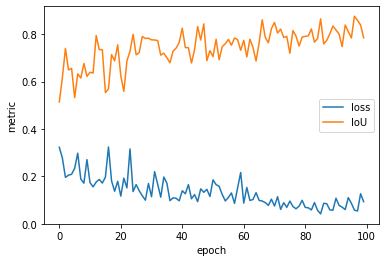

In [20]:
plt.plot(train_loss, label='loss')
plt.plot(train_iou, label='IoU')

plt.xlabel('epoch')
plt.ylabel('metric')

plt.legend()

plt.show()

Čuvanje modela nakon izvršene faze treniranja.

In [21]:
torch.save(model.cpu().state_dict(), MODEL_OUTPUT_PATH)

Prikaz određenih slika sa pravim i predviđenim maskama kao i sa ostvarenom IoU vrijednošću. Radi lakšeg razlikovanja zelenom je označena prava, a crvenom bojom predviđena maska.

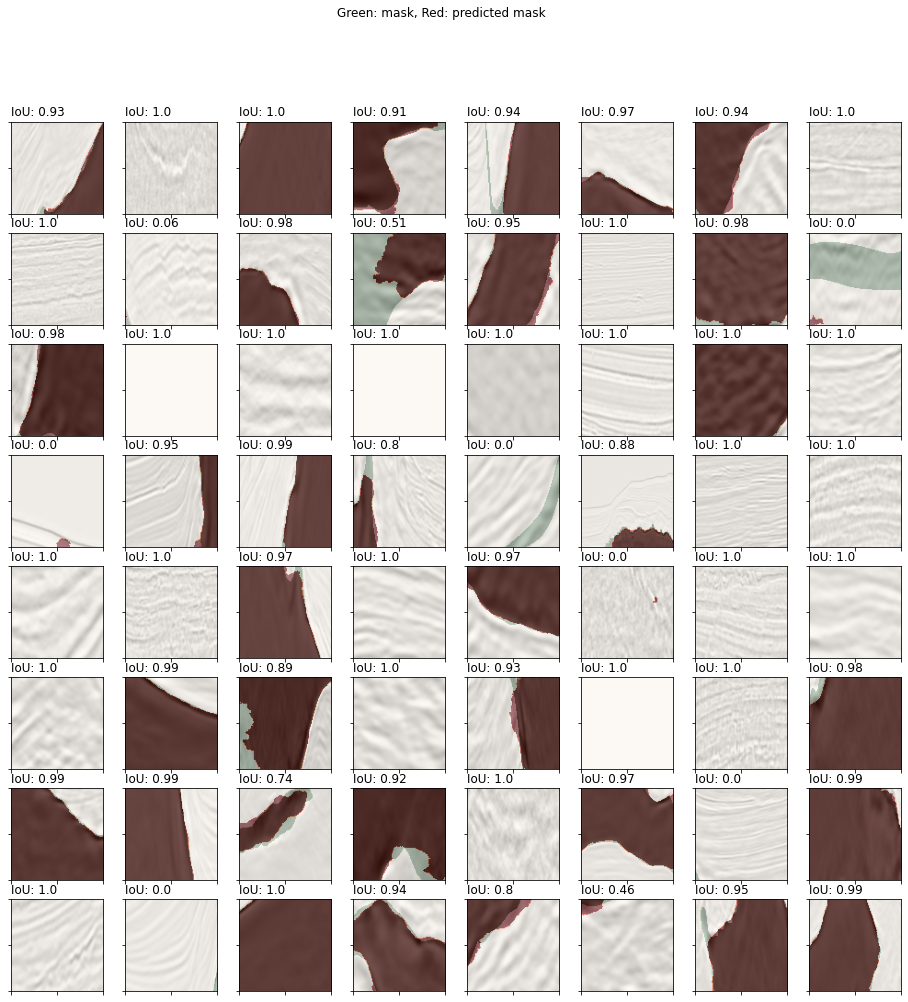

In [22]:
trainiter = iter(train_dataloader)
images, masks = next(trainiter)

output = model(images)
pred = torch.where(output < 0., torch.zeros_like(output), torch.ones_like(output))
iou = get_iou_score(output, masks).numpy()

max_images = output.size(0)

grid_width = 8

grid_height = int(max_images / grid_width)

fig, axs = plt.subplots(grid_height, grid_width, figsize=(grid_width * 2,grid_height * 2))

for i, _data in enumerate(zip(images, masks, pred, iou)):
    image, mask, pred, iou = _data
    
    ax = axs[int(i / grid_width), i % grid_width]
    
    ax.imshow(image.squeeze(), cmap='Greys')
    ax.imshow(mask.squeeze(), cmap='Greens', alpha=0.5)
    ax.imshow(pred.squeeze(), cmap='Reds', alpha=0.5)

    ax.set_title('IoU: ' + str(round(iou, 2)), loc='left')

    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
plt.suptitle('Green: mask, Red: predicted mask')

plt.show()

Nakon treniranja i evaluacije ostaje još testiranje. Pod testiranjem, u ovom projektu, podrazumijeva se prolaz kroz sve test slike i rezultat predikcije se čuva u poseban CSV fajl koji sadrži piksele slike gdje je predviđeno prisustvo soli.

In [23]:
def rle_encode(im):
    pixels = im.flatten(order='F')
    pixels = np.concatenate([[0], pixels, [0]])

    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1

    runs[1::2] -= runs[::2]
    
    return ' '.join(str(x) for x in runs)

transforms = T.Compose([T.Grayscale(), T.ToTensor()])

In [24]:
sub_df = pd.read_csv(SAMPLE_SUBMISSION_PATH)

n = sub_df.shape[0]

rle_mask = []

for idx in range(n):
    sample = sub_df['id'][idx]
    
    image = Image.open(os.path.join(IMAGE_DATASET_TEST_PATH + '/{}.png'.format(sample)))
    image = transforms(image)

    out = model(image.unsqueeze(0)).squeeze()

    pred = torch.where(out < 0., torch.zeros_like(out), torch.ones_like(out))

    rle_mask.append(rle_encode(pred.numpy()))
    
sub_df['rle_mask'] = rle_mask

In [25]:
sub_df.to_csv('submission.csv', index=False)